### Variables categoricas ordinales

1. Importe los datos del archivo `data.csv`

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [79]:
df = pd.read_csv("data.csv")

In [80]:
df.head()

,Escolaridad,No. de hijos
0,Primaria trunca,9
1,Secundaria,3
2,Preparatoria,2
3,Sin escolaridad,3
4,Primaria,2


2. Sustituya ahora la variable categórica por valores resultantes de un polinomio cuadrático estrictamente decreciente.

In [81]:
df_reordered_unique_columns = df.Escolaridad.unique()
df_reordered_unique_columns = [df_reordered_unique_columns[2], df_reordered_unique_columns[1],
                               df_reordered_unique_columns[4], df_reordered_unique_columns[0],
                               df_reordered_unique_columns[3]]
df_reordered_unique_columns

['Preparatoria',
 'Secundaria',
 'Primaria',
 'Primaria trunca',
 'Sin escolaridad']

reordenamos las categorías para que queden ordenadas de mayor a menor escolaridad

In [82]:
cuadratic_features = PolynomialFeatures(degree=2).fit_transform(
  pd.factorize(df_reordered_unique_columns)[0].reshape(-1, 1))[:, 2]
cuadratic_features = dict(zip(df_reordered_unique_columns,cuadratic_features))
cuadratic_features

{'Preparatoria': 0.0,
 'Secundaria': 1.0,
 'Primaria': 4.0,
 'Primaria trunca': 9.0,
 'Sin escolaridad': 16.0}

In [83]:
df['Escolaridad_cuad'] = df['Escolaridad'].map(cuadratic_features)
df

,Escolaridad,No. de hijos,Escolaridad_cuad
0,Primaria trunca,9,9.0
1,Secundaria,3,1.0
2,Preparatoria,2,0.0
3,Sin escolaridad,3,16.0
4,Primaria,2,4.0
...,...,...,...
5055,Secundaria,1,1.0
5056,Preparatoria,3,0.0
5057,Primaria,1,4.0
5058,Secundaria,3,1.0


3. Obtenga una relación lineal usando la clase *LinearRegression* del paquete *sklearn.linear_model*, para la codificacón obtenida y la variable `No. de hijos` y grafique.

In [84]:
lin = LinearRegression()
lin.fit(df[['Escolaridad_cuad']], df['No. de hijos'])

LinearRegression()

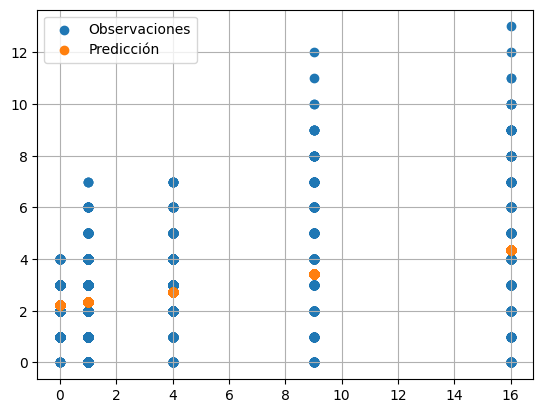

In [85]:
f = lin.predict(df[['Escolaridad_cuad']])
plt.scatter(df['Escolaridad_cuad'], df['No. de hijos'], label='Observaciones')
plt.scatter(df['Escolaridad_cuad'], f, label='Predicción')
plt.legend()
plt.grid()

y así podemos ver la predicción